In [2]:
%pip install -q -U 'google-generativeai>=0.8.3'

In [1]:
!git clone https://github.com/shaoanlu/gemini_maze_exploration.git

Cloning into 'gemini_maze_exploration'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 52 (delta 20), reused 45 (delta 16), pack-reused 0 (from 0)
Receiving objects: 100% (52/52), 1.04 MiB | 6.46 MiB/s, done.
Resolving deltas: 100% (20/20), done.


In [1]:
%cd gemini_maze_exploration

/content/gemini_maze_exploration


In [2]:
%load_ext autoreload
%autoreload 2

## Imports

Free google API key for this demo can be obtained from [AU Studio](https://aistudio.google.com/app/apikey) with [detailed instructions in this docs](https://ai.google.dev/gemini-api/docs/api-key).

In [3]:
from google.colab import userdata
import os

instruction = open("prompt.txt", "r", encoding="utf-8").read()
os.environ["GOOGLE_API_KEY"] = userdata.get('GOOGLE_API_KEY')

In [4]:
from src.grid_manager import GridManager, GridConfig
from src.navigator import Navigator
from src.mission_controller import MissionController, MissionConfig
from src.gemini_chat import GeminiChat, GeminiThinkChat

In [5]:
from google import generativeai, genai
from matplotlib import pyplot as plt

## Instantiation of objects

In [6]:
grid_config = GridConfig()
grid_manager = GridManager(grid_config)
grid_manager.load_from_image("assets/floor1.jpg")

array([[1., 0., 0., 0., 0.],
       [1., 1., 1., 1., 0.],
       [1., 1., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 1.]])

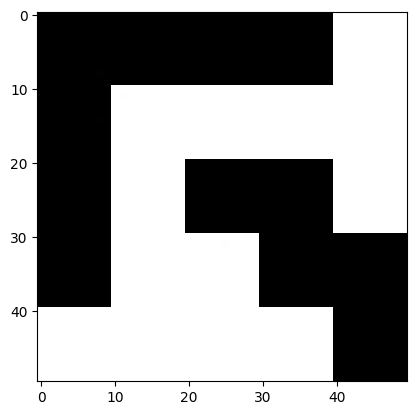

In [7]:
plt.imshow(grid_manager.image)

In [8]:
navigator = Navigator()

In [9]:
client = genai.Client(api_key=os.environ["GOOGLE_API_KEY"], http_options={"api_version": "v1alpha"})

In [10]:
mission_config = MissionConfig()
mission_config.max_attempts = 30
mission_controller = MissionController(grid_manager, navigator, mission_config)

## Start exploration

In [11]:
chat = GeminiThinkChat(client, model_name="gemini-2.0-flash-thinking-exp", instruction=instruction)
result = mission_controller.execute_mission(chat, debug=True)

[Trial 1]
prompt='Start. you are at (0.5, -0.3)'
self.waypoints=[array([0, 0]), array([1, 1]), array([2, 2]), array([3, 3]), array([4, 4])]
result='Failed: Stop at (2, 2), traversed cells: [(0, 0), (1, 0), (1, 1), (2, 1), (2, 2)]'

[Trial 2]
prompt='Failed: Stop at (2, 2), traversed cells: [(0, 0), (1, 0), (1, 1), (2, 1), (2, 2)]'
self.waypoints=[array([0, 0]), array([3, 0]), array([3, 1]), array([3, 2]), array([3, 3]), array([4, 3]), array([4, 4])]
result='Failed: Stop at (3, 1), traversed cells: [(0, 0), (1, 0), (2, 0), (3, 0), (3, 1)]'



In [12]:
result

('Success',
 [array([0, 0], dtype=int32),
  array([1, 0], dtype=int32),
  array([1, 1], dtype=int32),
  array([1, 2], dtype=int32),
  array([1, 3], dtype=int32),
  array([2, 3], dtype=int32),
  array([3, 3], dtype=int32),
  array([4, 3], dtype=int32),
  array([4, 4], dtype=int32)])

## Visualize result

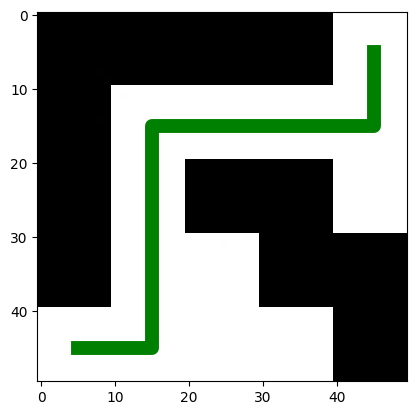

In [13]:
_, traversed_cells = result

xs, ys = [], []
for cell in traversed_cells:
    xs.append(10*cell[0]+5)
    ys.append(50-10*cell[1] - 5)
plt.plot(xs, ys, 'g', linewidth=10, label="Traversed cells")
plt.imshow(grid_manager.image)
plt.show()